In [11]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load learned model
generator = model_from_json(open('models/generator_model.json').read())
generator.load_weights('models/generator_weight.h5')
discriminator = model_from_json(open('models/discriminator_model.json').read())
discriminator.load_weights('models/discriminator_weight.h5')

In [5]:
batch_size = 32
input_dim = 1
seq_length = 30
latent_dim = 50
num_classes = 3


In [28]:
x = np.empty((5, 4))
x[:2,:] = np.ones((2,4))

array([[  1.00000000e+000,   1.00000000e+000,   1.00000000e+000,
          1.00000000e+000],
       [  1.00000000e+000,   1.00000000e+000,   1.00000000e+000,
          1.00000000e+000],
       [  3.25903121e-086,   3.35559141e-143,   6.01433264e+175,
          6.93885958e+218],
       [  5.56218858e+180,   3.94356143e+180,   4.66149394e-033,
          9.15509987e-071],
       [  4.08088288e+179,   8.16292882e-043,   7.75080467e-144,
          1.50008929e+248]])

In [34]:
def generate_samples(num_samples):
    gen_x = []
    gen_y = []
    gen_iter = (num_samples // batch_size) + 1
    for i in range(0, gen_iter):
        noise = np.random.normal(0, 1, (batch_size, seq_length, latent_dim))
        sample_c = np.random.randint(0, num_classes, batch_size)
        gen_x.extend(generator.predict([noise, sample_c]))
        gen_y.extend(sample_c)
    gen_x_arr = np.array(gen_x)
    gen_y_arr = np.array(gen_y)
    return (gen_x_arr[:num_samples], gen_y_arr[:num_samples])

In [37]:
gen_x, gen_y = generate_samples(num_samples=100)

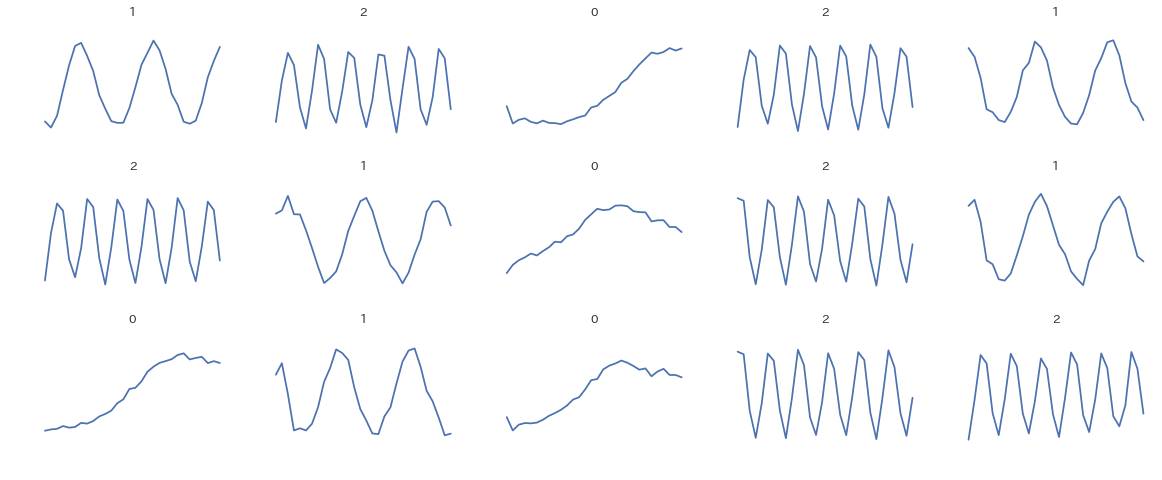

In [38]:
show_samples = 15
idxes = np.random.randint(0, gen_x.shape[0], show_samples)
plt.figure(figsize=(20, 8))
# show sin wave
for i in range(show_samples):
    plt.subplot(3, show_samples / 3, i + 1)
    plt.plot(gen_x[idxes[i]].squeeze())
    plt.ylim(-0.8, 0.8)
    plt.title(gen_y[idxes[i]])
    plt.axis('off')